# Imports

In [2]:
# Standard library imports
from datetime import datetime
import json
import logging as log
import os
import requests
import sys
import time

# Third party imports
import pandas as pd
import numpy as np

# Local application imports
try:
    sys.path.insert(1, os.path.join(os.getcwd(), '../'))
    from scrap_figshare import read_input_file, search_figshare_with_query
    from scrap_figshare import extract_records, request_figshare_dataset_with_id
    from scrap_figshare import extract_data_from_figshare_zip_file, scrap_figshare_zip_content
    from scrap_figshare import main_scrap_figshare
    
    from analyze import prep_analyze, read_df
    from analyze import prepare_timeline_df, plot_timeline_dataset_files, plot_timeline_dataset_authors, plot_origin_count
    from analyze import prepare_ext_count_df, plot_timeline_category, plot_timeline_engine, plot_timeline_size_engine, plot_extension_engine
    from analyze import get_info_from_mdp, plot_temp_count
    from analyze import get_info_from_gro, plot_sys_size_count
    
except (ModuleNotFoundError, ImportError) as e:
    print(f"{type(e)} fileure: {e}")
else:
    print("Import succeeded")


Import succeeded


# Functions

In [3]:
class AttrDict(dict):
    """Argument parser.

    This function parses a dictionary into a argparse-like dictionary.

    Returns
    -------
    argparse dictionary
    """
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

# Reading

In [4]:
# read dataframe from datasets and files
dataset_tsv = "figshare_datasets.tsv"
files_tsv = "figshare_files.tsv"
args = AttrDict()
args.update({'input_dataset_file': os.path.join(os.getcwd(), dataset_tsv), 
             'input_files_file': os.path.join(os.getcwd(), files_tsv),
            })
# Call extract main prep function
figshare_datasets_df, figshare_files_df, figshare_all_df = prep_analyze(args)

Number of files: 4244
Number of datasets: 1766
Number of files after cleaning: 4244
Number of datasets: 1766


In [5]:
# read dataframe from datasets and files
dataset_tsv = "zenodo_datasets.tsv"
files_tsv = "zenodo_files.tsv"
args = AttrDict()
args.update({'input_dataset_file': os.path.join(os.getcwd(), dataset_tsv), 
             'input_files_file': os.path.join(os.getcwd(), files_tsv),
            })
# Call extract main prep function
zenodo_datasets_df, zenodo_files_df, zenodo_all_df = prep_analyze(args)

Number of files: 15334
Number of datasets: 854
Number of files after cleaning: 15334
Number of datasets: 854


In [6]:
datasets_df = zenodo_datasets_df.copy()
datasets_df = datasets_df.append(figshare_datasets_df).reset_index(drop=True)
files_df = zenodo_files_df.copy()
files_df = files_df.append(figshare_files_df).reset_index(drop=True)
all_df = zenodo_all_df.copy()
all_df = all_df.append(figshare_all_df).reset_index(drop=True)

# Analysis & plots

## Plotting dataset statistics (timeline and counts)

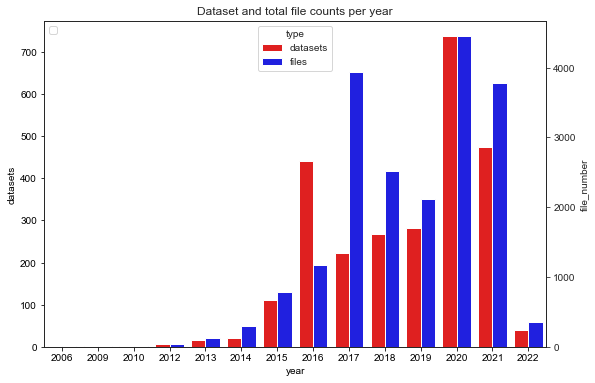

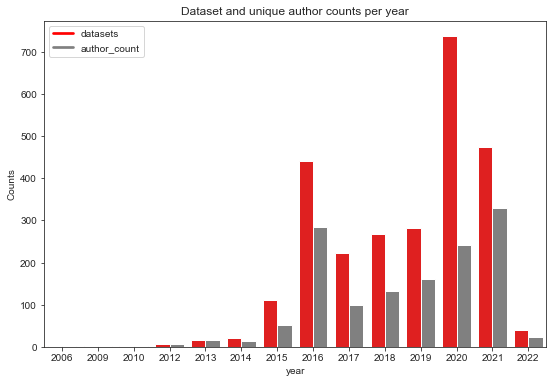

In [7]:
# timeline plot
timeline_ana_df = prepare_timeline_df(datasets_df)
plot_timeline_dataset_files(timeline_ana_df)
plot_timeline_dataset_authors(timeline_ana_df)



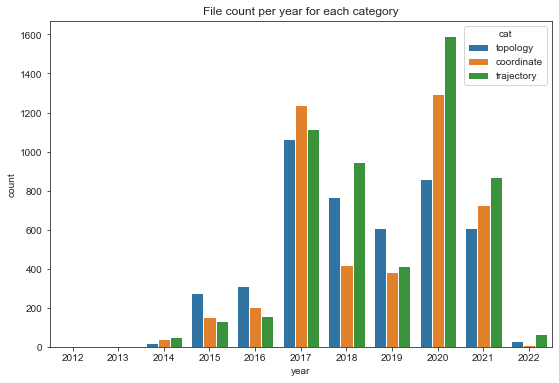

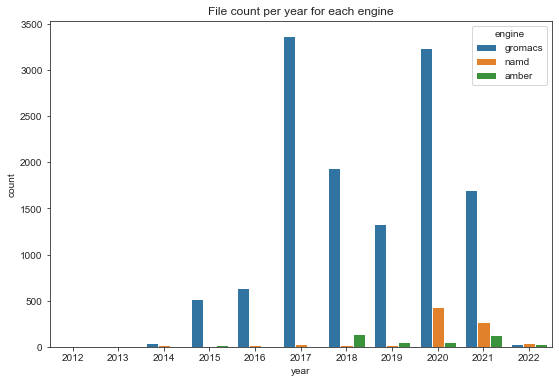

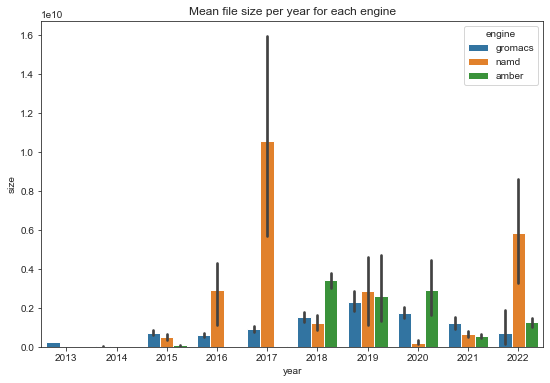

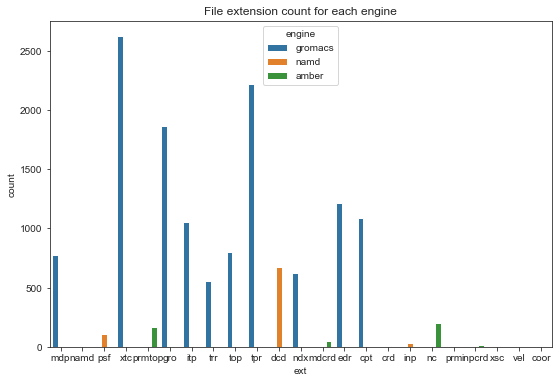

In [8]:
# plot file-dependent timeline plots
count_article_df = prepare_ext_count_df(all_df)
plot_timeline_category(count_article_df)
plot_timeline_engine(count_article_df)
plot_timeline_size_engine(count_article_df)
plot_extension_engine(count_article_df)

In [11]:
# filesize
print(f"Total file size: {files_df['file_size'].sum()/10**12:.1f} TB, {len(files_df)} files")
print(f"Total file size (excl. zip): {files_df.loc[files_df['file_type']!='zip', 'file_size'].sum()/10**12:.1f} TB, {len(files_df.loc[files_df['file_type']!='zip'])} files")

Total file size: 10.2 TB, 19578 files
Total file size (excl. zip): 7.8 TB, 16836 files


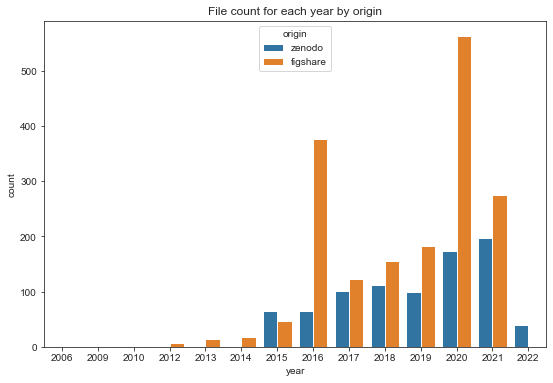

In [12]:
datasets_df['year'] = datasets_df['date_creation'].apply(lambda x: int(x.split('-')[0]))
plot_origin_count(datasets_df)

## Plotting information grapped from file content (e.g. temperature from mdp & filesize from gro)

In [11]:
%%time
# get mdp information
temp_df = get_info_from_mdp(all_df)
# plot mdp information
plot_temp_count(temp_df)


Number of mdp files: 778


IndexError: list index out of range

In [ ]:
%%time
# get mdp information
sys_size_df = get_info_from_gro(all_df)
# plot information
plot_sys_size_count(sys_size_df)


Number of gro files: 1863
ERROR for dataset ID: 3966306, file name: eq_coexistence_DPPC_large.gro
